# Polynomial Linear Regression (PLR)
Polynomial Linear Regression uses a best-fit line with higher degrees.

### Formula
```y = b0 + b1*x + b2*x^2 + ... bn*x^n```
- n is highest degree
- y is the dependent variable
- m is the slope (rate of change)
- x is the independent variable
- b0 is the y-intercept of the line

Notice that there's only one independent variable, x; but multiple coefficients up to n.

### Why Is It Linear?
The definition of a "linear" model is not based on the relationship between y and x, but instead its if the function can be expressed as a linear combination of the b-coefficients.

The goal of a regression model is to determine the b-coefficient, so if it's linearly determined then it's a linear model.

An example of a polynomial linear regression is:
- ```y = 2x^2 + 5x + 3``` where b2 = 2, b1 = 5, and b0 = 3

All b-coefficients were determined linearly, so it's a linear model.

A non-linear example would be:
- ```y = (b2*x^2) / (b0 + b1*x)```

# Example of Polynomial Linear Regression
<img src="images/plr/plr_example.png" height="75%" width="75%"></img>

A simple linear regression model would not be ideal for these data points because a polynomial regression model better-fits the data points. This example uses a polynomial regression model with a degree of 2.

# SKLearn Polynomial Linear Regression Model
The data set shows salary information for each position. The higher the level, the higher the position, thus the higher the salary.

The problem is that an HR person is trying to determine the salary of a person in-between a Partner and Senior Partner level. Unfortunately, a salary between those two level are not given, so the HR person needs to predict the salary. Looking at the data set, the level the HR person must predict is 6.5

Furthermore, based on the data set, the salary is best represented as a polynomial function.

In [4]:
# import the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# import the data set
customers_df = pd.read_csv("datasets/position_salaries.csv")

customers_df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [6]:
# the independent variable is the Level
x = customers_df.iloc[:, 1:2].values

# the dependent variable is the Salary
y = customers_df.iloc[:, 2].values

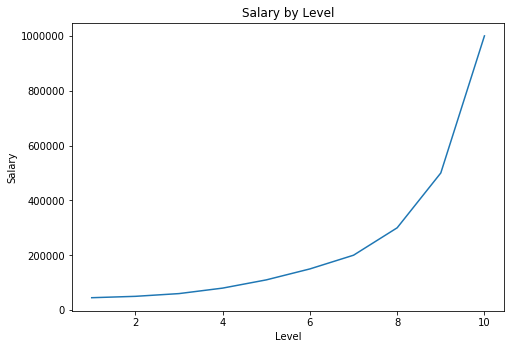

In [7]:
# let's create a scatterplot for x and y to better visualize the polynomial function
figure = plt.figure()
axes = figure.add_axes([1, 1, 1, 1])

# set labels
axes.set_xlabel("Level")
axes.set_ylabel("Salary")
axes.set_title("Salary by Level")

# scatter plot the salary, as you can see it's like a polynomial function with a degree of 4
axes.plot(x, y,)

# Building a Simple Linear Regression Model
Let's fit it to a simple linear regression model first before a polynomial linear regression model.
- This will help us better understand why a polynomial linear regressor is better

In [8]:
# import the linear regressor
from sklearn.linear_model import LinearRegression

In [9]:
# create a simple linear regressor, then fit the data set
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Building a Polynomial Linear Regression Model
Now, let's build the polynomial linear regression model to compare it to the simple model.

In [10]:
# import the polynomial features class
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# create a polynomial transformer for a degree of 4
poly_transform = PolynomialFeatures(degree=4)

# transform x to a polynomial with a degree of 4
x_poly = poly_transform.fit_transform(x)

"""
col 0 is x degree of 0, col 1 is x degree of 1, col 2 is x degree of 2,
col 3 is x degree of 3, and col 4 is x degree of 4.

This is modelled as:
x^0 + x^1 + x^2 + x^3 + x^4

So the regression model becomes polynomial:
y = b0*x^0 + b1*x^1 + b2*x^2 + b3*x^3 + b4*x^4
"""
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [12]:
# create a multiple linear regressor, then fit the x_poly and y
poly_reg = LinearRegression()
poly_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# Visualizing Simple Linear Regression Model
The graph shows that a simple linear regression model do not have great predictions.

We're quite far from the actual values within the regression model.  
In fact, a level of 6.5 has a salary of about 300,000. This shows the inaccuracy of the model.

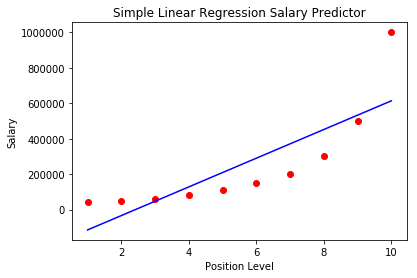

In [13]:
# actual results scatter plot
plt.scatter(x, y, color="red")

# predicted results best-fit line
y_pred = lin_reg.predict(x)
plt.plot(x, y_pred, color="blue")

# labels
plt.title("Simple Linear Regression Salary Predictor")
plt.ylabel("Salary")
plt.xlabel("Position Level")

plt.show()

# Visualizing Polynomial Linear Regression Model
The graph shows that a polynomial linear regression model has a better prediction.

A level of 6.5 shows a salary between 150,000 and 200,000, which is more accurate.

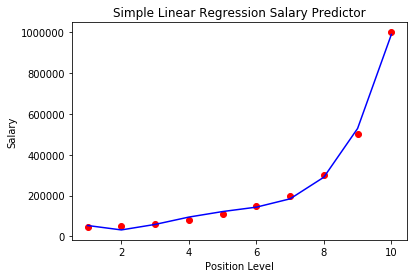

In [14]:
# actual results scatter plot
plt.scatter(x, y, color="red")

# predicted results best-fit line
y_pred = poly_reg.predict(x_poly)
plt.plot(x, y_pred, color="blue")

# labels
plt.title("Simple Linear Regression Salary Predictor")
plt.ylabel("Salary")
plt.xlabel("Position Level")

plt.show()

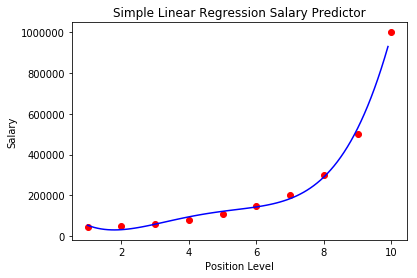

In [15]:
# actual results scatter plot
plt.scatter(x, y, color="red")

# remove the jaggidiness of the lines by using 0.1 increments of x
x_grid = np.arange(min(x), max(x), 0.1)

# re-shape the x_grid Array, then fit and transform it into a polynomial
x_grid = x_grid.reshape(len(x_grid), 1)
x_grid_poly = poly_transform.fit_transform(x_grid)

# predicted results best-fit line
y_pred = poly_reg.predict(x_grid_poly)
plt.plot(x_grid, y_pred, color="blue")

# labels
plt.title("Simple Linear Regression Salary Predictor")
plt.ylabel("Salary")
plt.xlabel("Position Level")

plt.show()

# Polynomial vs Simple Regression Model Comparision
Let's compare the two models and see their predictions.

As seen below, the polynomial prediction was more accurate when viewing the data set.

In [16]:
# predict 6.5 using the simple linear regression model
lin_reg.predict([[6.5]])

array([330378.78787879])

In [117]:
# predict 6.5 using the polynomial linear regression model
level_poly = poly_transform.fit_transform([[6.5]])
poly_reg.predict(level_poly)

array([158862.45265153])